In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import math
from sklearn.metrics import mean_squared_error
import networkx as nx
from networkx.algorithms import bipartite

In [2]:
'''
import gzip
import shutil
with gzip.open('citations.gz', 'rb') as f_in:
    with open('citations.json', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
'''

"\nimport gzip\nimport shutil\nwith gzip.open('citations.gz', 'rb') as f_in:\n    with open('citations.json', 'wb') as f_out:\n        shutil.copyfileobj(f_in, f_out)\n"

In [3]:
import json
# Opening JSON file
f = open('citations.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)

f.close()

In [4]:
nodes = list(data.keys())
len(nodes)

1354753

In [5]:
G = nx.DiGraph()

In [6]:
G.add_nodes_from(nodes)

In [7]:
edges = []
for node in nodes:
    node_edges = data[node]
    for edge in node_edges:
        edges.append((node, edge))

In [8]:
len(edges)

6849633

In [9]:
G.add_edges_from(edges)

In [10]:
inDegree = G.in_degree()

In [11]:
len(inDegree)

1396261

In [12]:
in_degrees = []
for i in list(inDegree):
    in_degrees.append(i[1])
len(in_degrees)

1396261

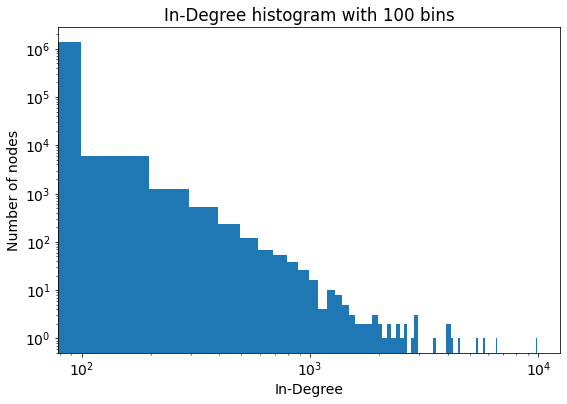

In [13]:
plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams.update({'font.size': 14})
plt.hist(in_degrees, bins = 100);
plt.xscale('log')
plt.yscale('log')
plt.xlabel("In-Degree")
plt.ylabel("Number of nodes")
plt.title("In-Degree histogram with 100 bins");

In [14]:
print("Max in-degree:",max(in_degrees),"Min in-degree:", min(in_degrees))
in_degrees_X = list(range(max(in_degrees)+1))
in_degrees_Y = [0]*len(in_degrees_X)
for i in in_degrees:
    in_degrees_Y[i] += 1

Max in-degree: 9866 Min in-degree: 0


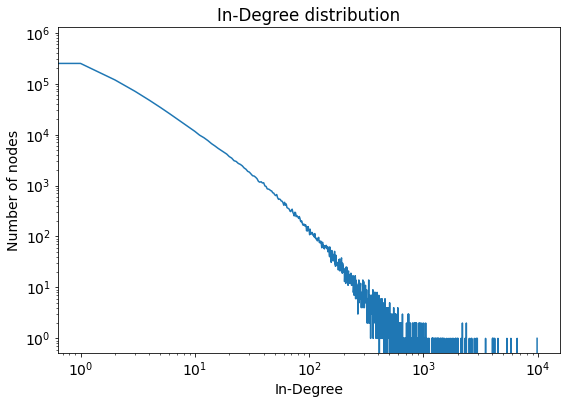

In [15]:
plt.plot(in_degrees_X, in_degrees_Y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("In-Degree")
plt.ylabel("Number of nodes")
plt.title("In-Degree distribution");

In [16]:
def line(x, a, b):
    return a + b*x
#Power law try
aux_in_degrees_Y = []
aux_in_degrees_X = []
for i in range(len(in_degrees_X)):
    if in_degrees_Y[i] != 0:
        aux_in_degrees_Y.append(in_degrees_Y[i])
        aux_in_degrees_X.append(in_degrees_X[i])
log_X = [math.log10(x) for x in aux_in_degrees_X[1:]]
log_Y = [math.log10(x) for x in aux_in_degrees_Y[1:]]
popt, pcov = curve_fit(line, log_X, log_Y)
a = popt[0]
b = popt[1]
fitted_line = [line(i, a, b) for i in log_X]
rmse = mean_squared_error(log_Y, fitted_line, squared=False)
fitted_line_y = [10**i for i in fitted_line]
a_o = 10**a
b_o = 10**b
lab = "Fitted: log(y) =" + str(round(a,3))+ " " + str(round(b,3)) + " * log(x) with RMSE = " + str(round(rmse,3))
lab

'Fitted: log(y) =5.834 -1.968 * log(x) with RMSE = 0.334'

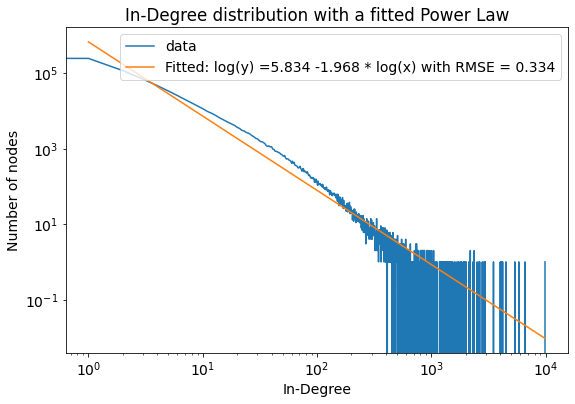

In [17]:
plt.plot(in_degrees_X, in_degrees_Y, label="data")
plt.plot(aux_in_degrees_X[1:], fitted_line_y, label=lab)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("In-Degree")
plt.ylabel("Number of nodes")
plt.title("In-Degree distribution with a fitted Power Law")
plt.legend();

In [18]:
outDegree = G.out_degree()

In [19]:
len(outDegree)

1396261

In [20]:
out_degrees = []
for i in list(outDegree):
    out_degrees.append(i[1])
len(out_degrees)

1396261

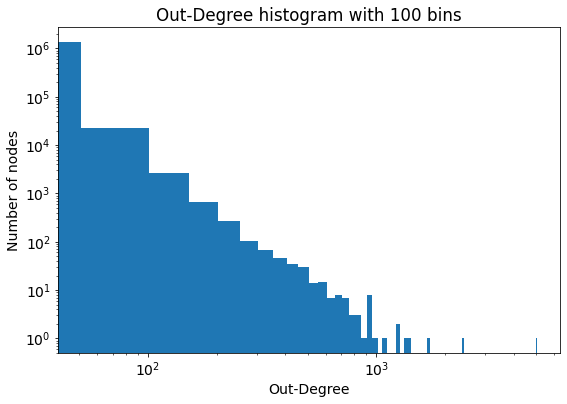

In [21]:
plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams.update({'font.size': 14})
plt.hist(out_degrees, bins = 100);
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Out-Degree")
plt.ylabel("Number of nodes")
plt.title("Out-Degree histogram with 100 bins");

In [22]:
print("Max out-degree:",max(out_degrees),"Min out-degree:", min(out_degrees))
out_degrees_X = list(range(max(out_degrees)+1))
out_degrees_Y = [0]*len(out_degrees_X)
for i in out_degrees:
    out_degrees_Y[i] += 1

Max out-degree: 5063 Min out-degree: 0


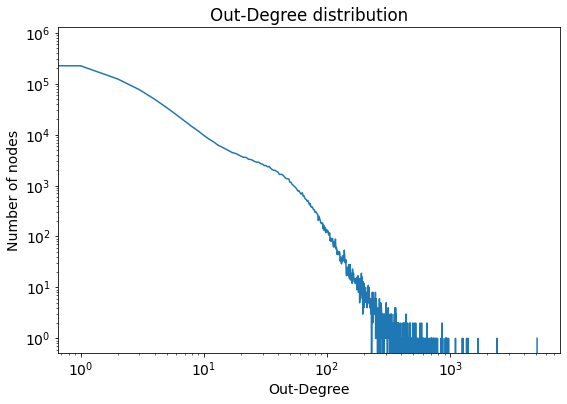

In [23]:
plt.plot(out_degrees_X, out_degrees_Y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Out-Degree")
plt.ylabel("Number of nodes")
plt.title("Out-Degree distribution");

In [24]:
def line(x, a, b):
    return a + b*x
#Power law try
aux_out_degrees_Y = []
aux_out_degrees_X = []
for i in range(len(out_degrees_X)):
    if out_degrees_Y[i] != 0:
        aux_out_degrees_Y.append(out_degrees_Y[i])
        aux_out_degrees_X.append(out_degrees_X[i])
log_X = [math.log10(x) for x in aux_out_degrees_X[1:]]
log_Y = [math.log10(x) for x in aux_out_degrees_Y[1:]]
popt, pcov = curve_fit(line, log_X, log_Y)
a = popt[0]
b = popt[1]
fitted_line = [line(i, a, b) for i in log_X]
rmse = mean_squared_error(log_Y, fitted_line, squared=False)
fitted_line_y = [10**i for i in fitted_line]
a_o = 10**a
b_o = 10**b
lab = "Fitted: log(y) =" + str(round(a,3))+ " " + str(round(b,3)) + " * log(x) with RMSE = " + str(round(rmse,3))
lab

'Fitted: log(y) =6.7 -2.455 * log(x) with RMSE = 0.376'

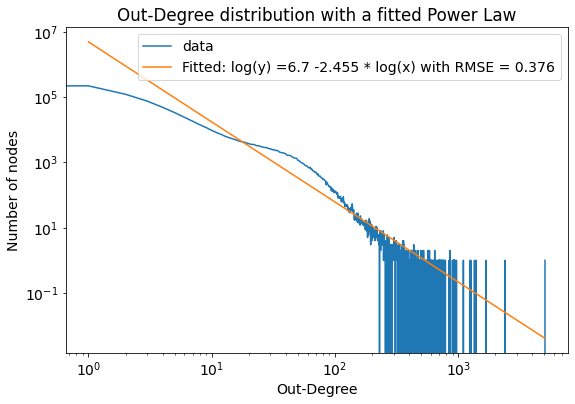

In [25]:
plt.plot(out_degrees_X, out_degrees_Y, label="data")
plt.plot(aux_out_degrees_X[1:], fitted_line_y, label=lab)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Out-Degree")
plt.ylabel("Number of nodes")
plt.title("Out-Degree distribution with a fitted Power Law")
plt.legend();

## As we can see in the graphs above, both, in-degree and out-degree distributions can be fitted with a Power Law curve. All graphs are shown in a log-log scale and seeing a straight line in that scale implies that the data follows a Power Law curve. Furthermore, in the last graph for in and out degrees, the fitter Power Law curve is shown with its parameters and RMSE. Based on the RMSE and by observing that the in-degree fitted line follows more closely the data, we can say that the in-degree is better explained with the Power Law than the out-degree.

In [26]:
for edge in edges:
    e1 = edge[0].split("/")[0].split(".")[0]
    if e1.isdigit():
        print(edge)
        break

('1006.3561', '0901.2936')


In [27]:
edges[0]

('alg-geom/9412010', 'alg-geom/9509005')

In [28]:
e = edges[0]
e1 = e[0].split("/")[0].split(".")[0]
e2 = e[1].split("/")[0].split(".")[0]
(e1,e2)

('alg-geom', 'alg-geom')

In [29]:
field_edges = []
field_nodes = set()
for edge in edges:
    e1 = edge[0].split("/")[0].split(".")[0]
    e2 = edge[1].split("/")[0].split(".")[0]
    if not e1.isdigit() and not e2.isdigit():
        field_nodes.add(e1)
        field_nodes.add(e2)
        if e1 != e2:
            field_edges.append((e1,e2))
print(len(field_edges))

334820


In [30]:
print(len(field_nodes))

34


In [31]:
field_edges_dict = {}
for f in field_edges:
    if f in field_edges_dict:
        field_edges_dict[f] += 1
    else:
        field_edges_dict[f] = 1
print(len(field_edges_dict.keys()))

420


In [32]:
list(field_edges_dict.keys())[:5]

[('alg-geom', 'hep-th'),
 ('alg-geom', 'q-alg'),
 ('alg-geom', 'math'),
 ('alg-geom', 'dg-ga'),
 ('comp-gas', 'hep-lat')]

In [33]:
list(field_edges_dict.items())[-5:]

[(('hep-lat', 'gr-qc'), 55),
 (('hep-lat', 'comp-gas'), 5),
 (('hep-lat', 'bayes-an'), 1),
 (('hep-lat', 'solv-int'), 1),
 (('hep-lat', 'supr-con'), 1)]

In [34]:
list(field_edges_dict.keys())[0][0]

'alg-geom'

In [35]:
field_network = []
for f in field_edges_dict.keys():
    field_network.append((f[0], f[1], field_edges_dict[f]))
len(field_network)

420

In [36]:
field_network[0]

('alg-geom', 'hep-th', 192)

In [37]:
df_ntw = pd.DataFrame(field_network, columns =['Source', 'Target','Weight'])
df_ntw

,Source,Target,Weight
0,alg-geom,hep-th,192
1,alg-geom,q-alg,11
2,alg-geom,math,6
3,alg-geom,dg-ga,16
4,comp-gas,hep-lat,1
...,...,...,...
415,hep-lat,gr-qc,55
416,hep-lat,comp-gas,5
417,hep-lat,bayes-an,1
418,hep-lat,solv-int,1


In [38]:
df_ntw.to_csv("field_network.csv")

In [39]:
df_ntw.sort_values(by="Weight", ascending=False)

,Source,Target,Weight
73,hep-ph,hep-ex,33704
71,hep-ph,hep-th,27368
347,hep-th,hep-ph,25668
76,hep-ph,astro-ph,19475
11,gr-qc,hep-th,19022
...,...,...,...
168,astro-ph,patt-sol,1
278,nucl-th,chem-ph,1
277,nucl-th,funct-an,1
276,nucl-th,atom-ph,1


## In the following image we can see the resulting network between fields. Note that all of the fields listed in the article's id are shown but only edges with weight > 1000 are shown for easier visualization.

<img src = "https://raw.githubusercontent.com/AlexanderOG/AI_CRI/main/all_nodes.png"></img>

## The following image shows only nodes with a total degree (in-degree + out-degree) higher than 20 and only edges with a weight > 2000. We can see that the most cited field is hep-th and hep-th <-> hep-ph are the highest linked nodes. Also, we can see that even though physics and quant-ph have a high total degree, they are not cited (and they don't cite) more than 2000 papers from the other high degree fields.
<img src="https://raw.githubusercontent.com/AlexanderOG/AI_CRI/main/top_degree_and_edges.png"></img>

In [40]:
df_in_deg = pd.DataFrame(list(inDegree), columns=["Node", "Degree"])
df_in_deg.sort_values(by="Degree", ascending=False)

,Node,Degree
1332521,hep-th/9711200,9866
1334962,hep-th/9802150,6600
1334975,hep-th/9802109,5819
352338,1412.6980,5374
784109,1502.01589,4484
...,...,...
640046,1605.00934,0
640047,1605.07347,0
640049,1605.00245,0
640050,1605.06382,0


In [41]:
df_in_deg = df_in_deg.sort_values(by="Degree", ascending=False)

In [42]:
def get_out_field(article):
    e1 = article.split("/")[0].split(".")[0]
    if not e1.isdigit():
        return df_ntw[df_ntw["Source"] == e1].Weight.sum()
    else:
        return 0

In [43]:
df_in_deg["Field_Weight"] = df_in_deg.apply(lambda row : get_out_field(row["Node"]), axis = 1)

In [44]:
df_in_deg

,Node,Degree,Field_Weight
1332521,hep-th/9711200,9866,73295
1334962,hep-th/9802150,6600,73295
1334975,hep-th/9802109,5819,73295
352338,1412.6980,5374,0
784109,1502.01589,4484,0
...,...,...,...
640046,1605.00934,0,0
640047,1605.07347,0,0
640049,1605.00245,0,0
640050,1605.06382,0,0


In [45]:
df_in_deg["Spread"] = df_in_deg["Degree"]*df_in_deg["Field_Weight"]
df_in_deg

,Node,Degree,Field_Weight,Spread
1332521,hep-th/9711200,9866,73295,723128470
1334962,hep-th/9802150,6600,73295,483747000
1334975,hep-th/9802109,5819,73295,426503605
352338,1412.6980,5374,0,0
784109,1502.01589,4484,0,0
...,...,...,...,...
640046,1605.00934,0,0,0
640047,1605.07347,0,0,0
640049,1605.00245,0,0,0
640050,1605.06382,0,0,0


## The following table summarizes the 10 most influential papers in the arXiv database. I used a metric that combined the local degree with the out influence of each field. So, if an article is highly cited and it is from a highly influential field (to other fields) it is considered as highly influential in the total network.

In [46]:
df_in_deg.sort_values(by="Spread",ascending=False).head(10).Node.reset_index()

,index,Node
0,1332521,hep-th/9711200
1,1334962,hep-th/9802150
2,73667,hep-ph/0603175
3,1334975,hep-th/9802109
4,68846,hep-ph/9905221
5,64598,hep-ph/9803315
6,31255,hep-ph/0201195
7,1330830,hep-th/9905111
8,1326389,hep-th/9906064
9,42020,hep-ph/9709356
